# 📊 Аналіз даних контенту соціальних мереж (Instagram, Youtube, Facebook, Tik Tok) : що робить публікацію вірусною?

## 1️. Вступ: Що ми хочемо дізнатися? 🤔
Ми досліджуємо залученість аудиторії у контент соціальних мереж, щоб зрозуміти, **які дописи стають вірусними**. Застосовуючи аналітичні інструменти, прогуляємося між рядків історії, яка покаже нам, на чому базуться емоційний відгук сучасного споживача контенту. 🚀

---

## 2. Аналіз якості даних: Що у нас є? 📂

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter


In [4]:
# Завантажуємо дані
print("🔍 Завантажуємо дані...")
df_content= pd.read_csv(r'C:\Users\User\OneDrive\Documents\test_sample.csv', encoding='utf-8-sig', delimiter=',', on_bad_lines='skip')

🔍 Завантажуємо дані...


In [5]:
# Переглядаємо структуру
print("🔢 Інформація про датасет:")
print(df_content.info())
print("📊 Описова статистика:")
print(df_content.describe())


🔢 Інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10525 entries, 0 to 10524
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         10525 non-null  object 
 1   account_id       10000 non-null  object 
 2   id               10047 non-null  object 
 3   created_time     10000 non-null  object 
 4   text_original    7660 non-null   object 
 5   text_additional  3 non-null      object 
 6   likes_count      9951 non-null   float64
 7   shares_count     5000 non-null   float64
 8   comments_count   9908 non-null   float64
 9   views_count      5621 non-null   float64
dtypes: float64(4), object(6)
memory usage: 822.4+ KB
None
📊 Описова статистика:
         likes_count  shares_count  comments_count   views_count
count    9951.000000   5000.000000     9908.000000  5.621000e+03
mean     1414.377851     79.232000      299.861122  1.797353e+04
std      5989.211037    979.564848   

In [6]:
print("🛑 Пропущені значення:")
print(df_content.isnull().sum())

🛑 Пропущені значення:
platform               0
account_id           525
id                   478
created_time         525
text_original       2865
text_additional    10522
likes_count          574
shares_count        5525
comments_count       617
views_count         4904
dtype: int64


📌 **Висновок**: Дані містять пропущені значення та можуть мати некоректні записи. Потрібно очистити їх перед аналізом.

## 3️. Видалення неінформативних рядків 🗑️
Перш ніж аналізувати, давайте позбудемося рядків, де інформацію про платформу неможливо визначити


In [7]:
# Список коректних платформ, базуючись на попередній оцінці файлу у Excel
valid_platforms = ["Instagram", "TikTok", "Facebook", "YouTube"]

# Видаляємо некоректно введені платформи
print("🧹 Чистимо датасет...")
df_content = df_content[df_content['platform'].isin(valid_platforms)]
print(f"✅ Залишилось записів: {len(df_content)}")

🧹 Чистимо датасет...
✅ Залишилось записів: 10000


## 4. Як розподілена активність користувачів за платформами? 🌍


In [18]:
# Зведена таблиця за платформами
print("📊 Аналіз платформ...")
platform_summary = df_content.groupby('platform').agg({
    'likes_count': 'sum',
    'comments_count': 'sum',
    'views_count': 'sum',
    'shares_count': 'sum'
}).sort_values(by='likes_count', ascending=False)
print(platform_summary)

📊 Аналіз платформ...
           likes_count  comments_count  views_count  shares_count
platform                                                         
YouTube      5744059.0        340304.0   56918162.0           0.0
TikTok       3786344.0        950179.0   39739895.0      232970.0
Instagram    3688162.0        568229.0          0.0           0.0
Facebook      855909.0       1112312.0    4371149.0      163190.0


📌 **Висновки:**
- **YouTube** має найбільшу кількість лайків (5,7 млн) і переглядів (56,9 млн), проте коментарів значно менше, ніж у Facebook.
- **TikTok** займає друге місце за лайками (3,7 млн) та коментарями (950 тис.), проте має найбільше поширень (232 тис.).
- **Instagram** має приблизно таку ж кількість лайків, як TikTok, але немає доступних даних про перегляди та поширення.
- **Facebook** має менше лайків (855 тис.), але найбільшу кількість коментарів (1,1 млн), що може свідчити про активнішу взаємодію користувачів у вигляді обговорень.

## 5️. Візуалізація: Оцінимо візуально розподіл даних та напрями кореляції між ними. 🎨


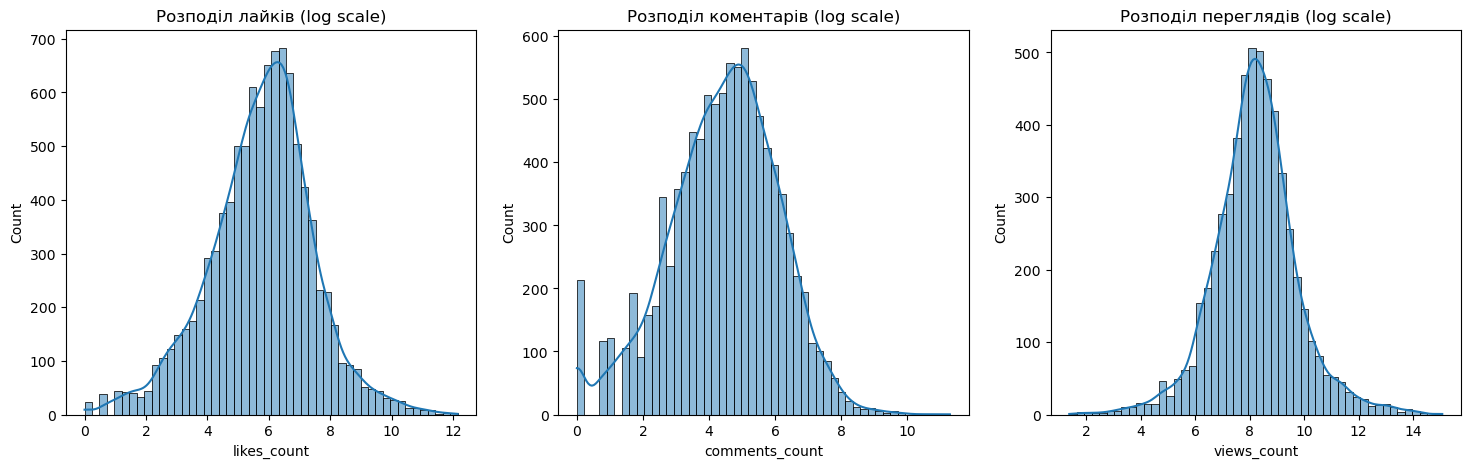

In [9]:
# Розподіл активності (логарифмічна шкала)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(np.log1p(df_content['likes_count']), bins=50, ax=axes[0], kde=True)
axes[0].set_title("Розподіл лайків (log scale)")
sns.histplot(np.log1p(df_content['comments_count']), bins=50, ax=axes[1], kde=True)
axes[1].set_title("Розподіл коментарів (log scale)")
sns.histplot(np.log1p(df_content['views_count']), bins=50, ax=axes[2], kde=True)
axes[2].set_title("Розподіл переглядів (log scale)")
plt.show()

📌**Висновки** 

- **Розподіл лайків**: Є значна кількість постів з дуже низькою кількістю лайків, а також окремі випадки з високим рівнем популярності, що створює довгий хвіст у розподілі.
- **Розподіл коментарів**: Має схожу картину з лайками – більшість постів отримують мало коментарів, але є група вірусних постів із тисячами взаємодій.
- **Розподіл переглядів**: Спостерігається сильна концентрація навколо малих значень, але є значна кількість постів із великою кількістю переглядів, що відповідає вірусному контенту.
- **Логарифмічна шкала** допомагає краще зрозуміти розподіл, оскільки дані мають високий рівень асиметрії.


c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


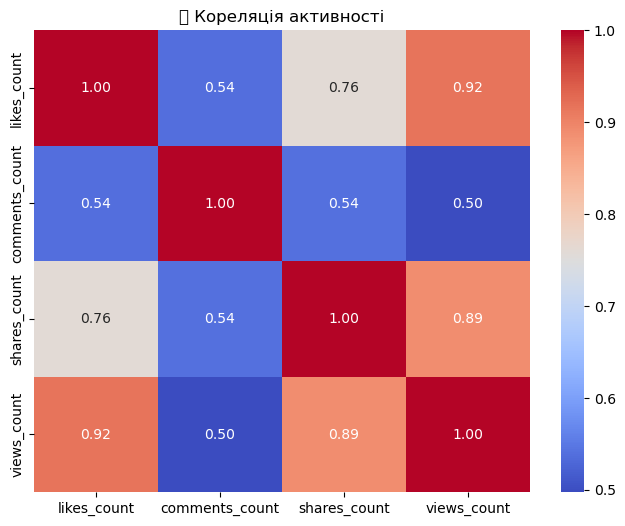

In [20]:
# Теплова карта кореляції
plt.figure(figsize=(8, 6))
sns.heatmap(df_content[['likes_count', 'comments_count', 'shares_count', 'views_count']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔥 Кореляція активності")
plt.show()

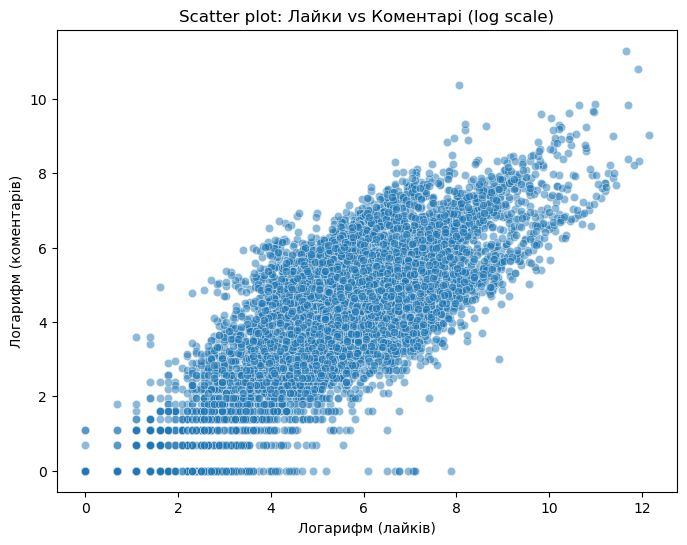

In [21]:
# Scatter plot для лайків і коментарів (логарифмічна шкала)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=np.log1p(df_content['likes_count']), y=np.log1p(df_content['comments_count']), alpha=0.5)
plt.xlabel("Логарифм (лайків)")
plt.ylabel("Логарифм (коментарів)")
plt.title("Scatter plot: Лайки vs Коментарі (log scale)")
plt.show()

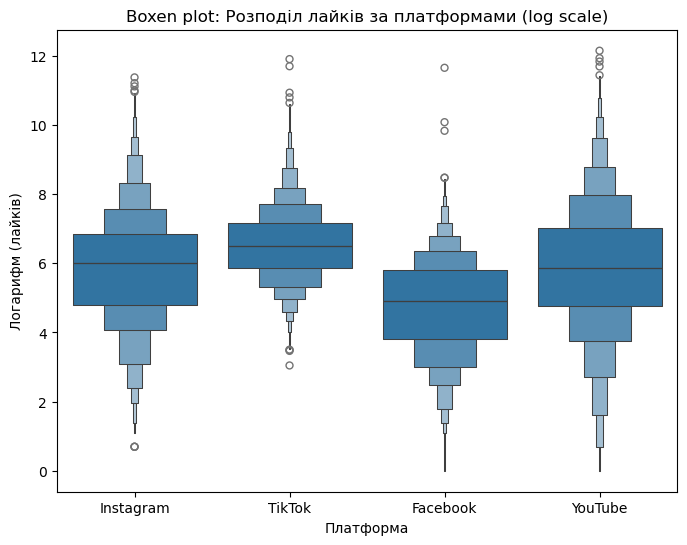

In [28]:
# Boxen plot для платформ (логарифмічна шкала)
plt.figure(figsize=(8, 6))
sns.boxenplot(x='platform', y=np.log1p(df_content['likes_count']), data=df_content)
plt.ylabel("Логарифм (лайків)")
plt.xlabel("Платформа")
plt.title("Boxen plot: Розподіл лайків за платформами (log scale)")
plt.show()

📌 **Висновки:**
- **TikTok** має найбільш розподілені лайки, що означає широку варіативність вірусності контенту – від низької до високої.
- **Instagram** показує схожий розподіл, але має меншу розкиданість, що свідчить про більш стабільну взаємодію користувачів.
- **Facebook** демонструє значну кількість постів із низьким залученням, проте окремі пости мають високі показники лайків.
- **YouTube** містить найбільш вірусні пости, але також має велику кількість контенту з малими показниками залучення.

## 6. Що робить публікацію вірусною? 🚀


In [23]:
# Визначаємо вірусні пости, як ті, що входять у топ 5% за кількістю лайків. Тобто, вони перевищують 95-й процентиль лайків у датасеті.
viral_threshold = df_content['likes_count'].quantile(0.95)
viral_posts = df_content[df_content['likes_count'] >= viral_threshold]
print(f"🔥 Всього вірусних постів: {len(viral_posts)}")


🔥 Всього вірусних постів: 498


C:\Users\User\AppData\Local\Temp\ipykernel_13176\4039095200.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=viral_share.index, y=viral_share.values, palette='coolwarm', ax=ax)


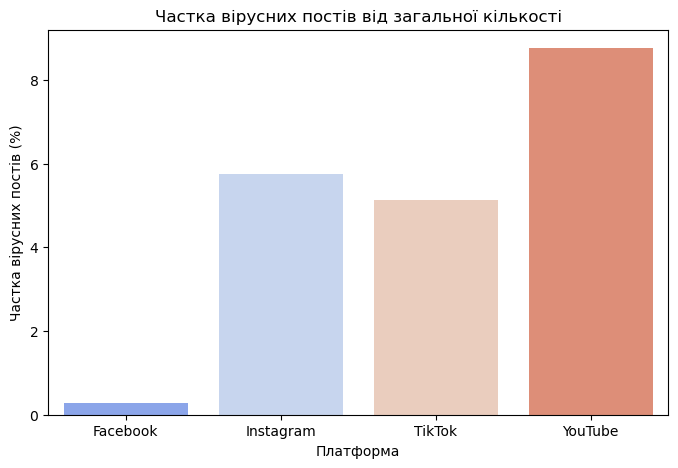

In [24]:
# Підраховуємо загальну кількість постів і вірусних постів за платформами
platform_counts = df_content['platform'].value_counts()
viral_platform_counts = viral_posts['platform'].value_counts()

# Обчислюємо частку вірусних постів від загальної кількості
viral_share = (viral_platform_counts / platform_counts).fillna(0) * 100

# Будуємо стовпчикову діаграму
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=viral_share.index, y=viral_share.values, palette='coolwarm', ax=ax)
ax.set_ylabel("Частка вірусних постів (%)")
ax.set_xlabel("Платформа")
ax.set_title("Частка вірусних постів від загальної кількості")
plt.show()

📌 **Висновки:**
- **YouTube** має найбільшу частку вірусних постів, що вказує на довший життєвий цикл відеоконтенту та ефективну рекомендаційну систему.
- **Instagram** займає друге місце за вірусністю, що свідчить про активну взаємодію користувачів із контентом.
- **TikTok** знаходиться на третьому місці, що може бути пов’язано з алгоритмами швидкого поширення контенту, але меншою загальною часткою постів, що стали вірусними.
- **Facebook** демонструє найменшу частку вірусних постів. Це може бути наслідком змін у стрічці новин та алгоритмах ранжування. 


## 8. Аналіз мов та тематики постів 

In [29]:
# Аналіз часто вживаних слів у вірусних постах
def extract_words(text):
    return re.findall(r"\b\w{4,}\b", str(text).lower())
viral_words = viral_posts['text_original'].dropna().apply(extract_words).explode()
most_common_words = Counter(viral_words).most_common(20)
print("📌 ТОП-20 найбільш вживаних слів у вірусних постах:", most_common_words)

📌 ТОП-20 найбільш вживаних слів у вірусних постах: [('whatsapp', 325), ('https', 244), ('viber', 218), ('боже', 144), ('chat', 135), ('будь', 132), ('ласка', 129), ('invite', 109), ('натисніть', 92), ('мене', 90), ('preghiera', 75), ('божа', 75), ('посилання', 73), ('господь', 68), ('дякую', 66), ('gesù', 64), ('gruppo', 63), ('бога', 63), ('gc30mlj2ooubbap6pch5et', 62), ('групи', 62)]


📌 Висновки:

Значна кількість вірусних постів містить запрошення та посилання (наприклад, whatsapp, viber, chat, invite, посилання). Отже, месенджери дуже широко застосовуються як ланцюжки для поширення контенту.
Часто зустрічаються релігійні терміни (боже, господь, бога, благословення, gesù, preghiera), а значить помітна популярність релігійної тематики серед вірусного контенту.
Використання слів, що закликають до дії (будь, ласка, натисніть) - заклик згідно маркетингових стратегій залучення аудиторії.

In [33]:
# Визначення мов вірусних постів на основі ключових слів
language_keywords = {
    "it": ["dio", "gesù", "preghiera", "chiesa", "maria", "san", "bibbia"],
    "es": ["dios", "jesús", "oración", "iglesia", "biblia", "bendición"],
    "pl": ["bóg", "jezus", "modlitwa", "święty", "kościół", "biblia"],
    "uk": ["бог", "молитва", "господь", "віра", "ангел"],
    "en": ["god", "prayer", "jesus", "church", "bible", "faith"]
}

def detect_language_simple(text):
    if pd.isna(text):
        return "unknown"
    text = text.lower()
    for lang, keywords in language_keywords.items():
        if any(word in text for word in keywords):
            return lang
    return "unknown"

viral_posts = viral_posts.copy()
viral_posts.loc[:, 'language'] = viral_posts['text_original'].apply(detect_language_simple)
print("🌍 Розподіл мов у вірусних постах:")
print(viral_posts['language'].value_counts())


🌍 Розподіл мов у вірусних постах:
language
unknown    183
uk         147
it         128
pl          30
es           9
en           1
Name: count, dtype: int64


📌 **Висновок**: Визначення мов допомагає аналізувати аудиторію, на яку орієнтовані найуспішніші пости.
Згідно наведеної вибірки,
Українська (uk) є найбільш поширеною мовою вірусних постів, що може вказувати на активність української аудиторії або популярність тематики.
Італійська (it) також займає високу позицію, що може бути пов'язано з релігійною або культурною тематикою.
Невизначені (unknown) пости можуть містити змішані мови або слова, що не входять у наш словник ключових слів.
Польська (pl) та іспанська (es) зустрічаються значно рідше, але присутні в аналізі.

In [24]:
# Аналіз хештегів у вірусних постах
import re
from collections import Counter

def extract_hashtags(text):
    return re.findall(r"#\w+", str(text).lower())
viral_hashtags = viral_posts['text_original'].dropna().apply(extract_hashtags).explode()
most_common_hashtags = Counter(viral_hashtags).most_common(20)
print("🏷️ ТОП-20 хештегів:", most_common_hashtags)

🏷️ ТОП-20 хештегів: [('#боже', 110), ('#господь', 67), ('#ангел', 61), ('#молитва', 58), ('#бог', 49), ('#лдс', 48), ('#gesù', 45), ('#milano', 39), ('#preghiera', 38), ('#jezus', 32), ('#bergamo', 29), ('#puglia', 28), ('#зсу', 27), ('#pavia', 23), ('#bóg', 23), ('#napoli', 22), ('#duomodimilano', 21), ('#chiesa', 20), ('#roma', 20), ('#lazio', 20)]


📌 **Висновки:**
- **Релігійні хештеги домінують**: *#боже, #господь, #молитва, #ангел* вказують на популярність духовної тематики у вірусних постах.
- **Деякі пости не містять хештегів**: Це свідчить про те, що не всі вірусні пости обов’язково залежать від їх використання.

## 8. Чи залежить вірусність від часу ⏰


C:\Users\User\AppData\Local\Temp\ipykernel_13176\4176464665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viral_posts['created_time'] = pd.to_datetime(viral_posts['created_time'], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_13176\4176464665.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viral_posts['hour'] = viral_posts['created_time'].dt.hour


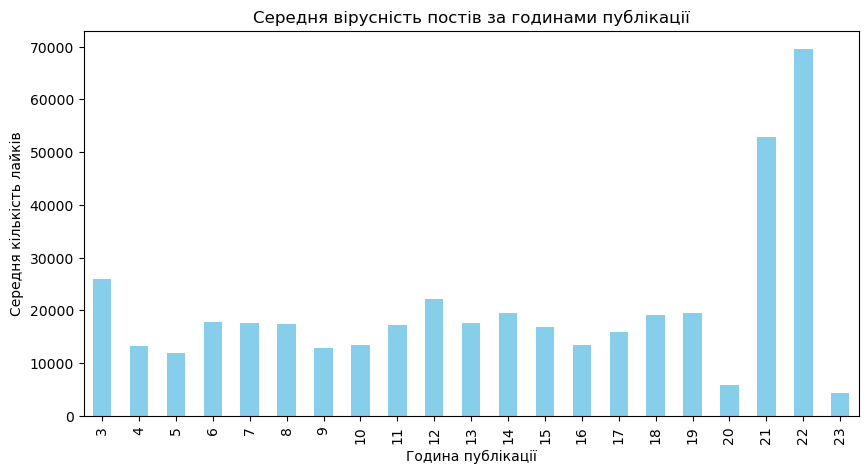

In [25]:
# Аналіз часу публікації

viral_posts = df_content[df_content['likes_count'] >= df_content['likes_count'].quantile(0.95)]
if 'created_time' in viral_posts.columns:
    viral_posts['created_time'] = pd.to_datetime(viral_posts['created_time'], errors='coerce')
    viral_posts['hour'] = viral_posts['created_time'].dt.hour
#else:
    #print("⚠️ Колонка 'ccreated_time' відсутня у даних, пропускаємо аналіз часу публікації.")
#viral_posts['hour'] = viral_posts['created_time'].dt.hour

# Середня кількість лайків за годину публікації
hourly_likes = viral_posts.groupby('hour')['likes_count'].mean()
plt.figure(figsize=(10, 5))
hourly_likes.plot(kind='bar', color='skyblue')
plt.xlabel("Година публікації")
plt.ylabel("Середня кількість лайків")
plt.title("Середня вірусність постів за годинами публікації")
plt.show()


📌 **Висновок**: Є пікові години, коли пости отримують найбільше лайків. Це важливо для оптимізації часу публікацій. 📌 
- **Найбільша вірусність постів спостерігається у вечірні години (21:00 - 22:00)**, що може бути пов’язано з тим, що користувачі активніше взаємодіють із контентом після роботи.
- **Обідні години (12:00 - 13:00) також мають високу активність**, що може вказувати на звички користувачів переглядати соцмережі під час перерви.
- **Нічні години (3:00) теж демонструють активність**, можливо, через автоматичне поширення контенту, часові зони або специфічну аудиторію.


📌 **Загальні висновки та можливі наприями подальшого аналізу читай у README**